# Imports

In [ ]:
from sklearn.datasets import load_iris, load_wine
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Data

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments.

For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**People**

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [ ]:
data_path = "https://storage.googleapis.com/edulabs-public-datasets/marketing_campaign.csv"

In [ ]:
df = pd.read_csv(data_path, delimiter='\t')

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Analysis

1. We have a discounted chocolate, whom should we target, and how?
2. We have a new wine in our store - what is the best way to promote it, and whom should we target?

# Preprocess data

Review, Clean, and prepare data for clustering

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df['Z_CostContact'].unique(), df['Z_Revenue'].unique()
# irrelevant columns - same value

(array([3]), array([11]))

In [ ]:
cols_to_drop = [
    "ID",
    "Z_CostContact",
    "Z_Revenue"
]

In [ ]:
df.drop(columns=cols_to_drop, inplace=True)

Convert datetime

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
df['Dt_Customer'].sort_values()

,Dt_Customer
1255,2012-07-30
1363,2012-07-31
2029,2012-08-01
724,2012-08-01
976,2012-08-01
...,...
1812,2014-06-28
45,2014-06-28
796,2014-06-28
200,2014-06-29


In [ ]:
df.loc[989]

,989
ID,453
Year_Birth,1956
Education,PhD
Marital_Status,Widow
Income,35340.0
Kidhome,1
Teenhome,1
Dt_Customer,2014-06-29 00:00:00
Recency,1
MntWines,27


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [ ]:
df['Recency'].sort_values()

,Recency
23,0
2201,0
1161,0
66,0
1834,0
...,...
1542,99
725,99
1033,99
1473,99


In [ ]:
df['Year_Birth'].sort_values()

,Year_Birth
239,1893
339,1899
192,1900
1950,1940
424,1941
...,...
2213,1995
1850,1995
995,1995
1170,1996


In [ ]:
px.box(df, y=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"])

Amounts look very low, expecially it would be nice to know what are these gold products, and how it can be that the prices are so low?

We don't know when this data has been collected, and it is important in order to understand whether numerical data like amounts, responses to campaigns, etc are related to the amount of time since customer has joined the club.

I will check this by taking some arbitrary date after the latest date_joined, and I will display sctter plots to see whether there is correlation between days since joined and amoutns / responses.

If there is a strong correlation - then probably the data contains information about customers with less than 2 years since joined. Otherwise, the data contains only longer-tine customers

In [ ]:
# amounts should be related to dat joined - customers who have recently joined
# probably spent less money?
df['days_since_2015'] = (pd.to_datetime('2015-01-01') - df['Dt_Customer']).dt.days

In [ ]:
df['total_amnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['total_responses'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [ ]:
px.scatter(df, x="days_since_2015", y="total_amnt")

In [ ]:
px.scatter(df, x="days_since_2015", y="total_responses")

It looks like there is no correlation - so we have full data for all the customers

Maybe we can even remove the DtCustomer column

Also drop temp columns we created

In [ ]:
df.drop(columns=["Dt_Customer", 'days_since_2015', 'total_amnt'], inplace=True)

Drop separate response to campaign cols - we created one column with total responses

In [ ]:
df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

Let check nulls

In [ ]:
df.isna().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0


24 columns with null in income - lets just drop these rows

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0


Let check outliers

In [ ]:
px.box(df['Income'])

We have one huge outlier for income - let remove it as many clustering algorithms are sensitive to outliers

In [ ]:
df[df['Income'] > 600000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,total_responses
2233,1977,Graduation,Together,666666.0,1,0,23,9,14,18,8,1,12,4,3,1,3,6,0,0


In [ ]:
df = df[df['Income'] < 600000]

In [ ]:
px.box(df['Income'])

In [ ]:
df['Complain'].value_counts()

,count
Complain,
0,2195
1,21


In [ ]:
px.box(df['Year_Birth'])

Very strange age outliers - might also be incorrect data, lets remove them

In [ ]:
df = df[df['Year_Birth'] > 1920]

In [ ]:
px.box(df['Year_Birth'])

In [ ]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain',
       'total_responses'],
      dtype='object')

In [ ]:
df['Kidhome'].value_counts()

,count
Kidhome,
0,1281
1,885
2,46


looks fine

In [ ]:
df['Teenhome'].value_counts()

,count
Teenhome,
0,1144
1,1017
2,51


In [ ]:
px.box(df['Recency'])

In [ ]:
px.box(df, y=["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"])

There are some outliers in plot, but not something I would remove

Now it's only left to take care of two categorical variables:
- Marital_Status
- Education

In [ ]:
df['Education'].value_counts()

,count
Education,
Graduation,1115
PhD,480
Master,365
2n Cycle,198
Basic,54


Lets combine Education types into one single column - high_education:
- true for Graduation, Master, PhD
- false for Basic, 2nd cycle

In [ ]:
df['high_education'] = df['Education'].apply(lambda x: True if x in ['Graduation', 'Master', 'PhD'] else False)
df.drop(columns=['Education'], inplace=True)

In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,571
Single,470
Divorced,231
Widow,76
Alone,3
Absurd,2
YOLO,2


Lets remove "Absurd" and "YOLO", and combine all the values to one boolean column - is_single
- True for Single, Divorced, Widow, Alone
- False for Married, Together

In [ ]:
df = df[df['Marital_Status'] != 'Absurd']
df = df[df['Marital_Status'] != 'YOLO']
df['is_single'] = df['Marital_Status'].apply(lambda x: True if x in ['Single', 'Divorced', 'Widow', 'Alone'] else False)
df.drop(columns=['Marital_Status'], inplace=True)

In [ ]:
df.shape

(2208, 20)

In [ ]:
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,total_responses,high_education,is_single
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,True,True
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,True,True
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,True,False
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,True,False
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,True,False


# Scale the data before clustering

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform dimensionality reduction

In [ ]:
import pandas as pd
import numpy as np
pca = PCA(n_components=10)
pca.fit(df_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

comp_variance = pd.DataFrame({
    'Component': range(1, len(explained_variance) + 1),
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance': cumulative_variance
})
comp_variance

,Component,Explained Variance Ratio,Cumulative Variance
0,1,0.321282,0.321282
1,2,0.100171,0.421452
2,3,0.064739,0.486191
3,4,0.059443,0.545634
4,5,0.050500,0.596134
5,6,0.049985,0.646119
6,7,0.049430,0.695549
7,8,0.044457,0.740005
8,9,0.036740,0.776745
9,10,0.034717,0.811462


Lets try reducing dimentions to 7 components

In [ ]:
components = 7

pca = PCA(n_components=components)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)


# K-means

In [ ]:
# prompt: use elbow method + silhouette to find clusters num, and run k means

# Find optimal number of clusters using Elbow and Silhouette methods
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(df_pca, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow Method
fig_elbow = px.line(x=range_n_clusters, y=inertia, markers=True, title='Elbow Method')
fig_elbow.update_layout(xaxis_title="Number of clusters", yaxis_title="Inertia")
fig_elbow.show()

# Plot Silhouette Method
fig_silhouette = px.line(x=range_n_clusters, y=silhouette_scores, markers=True, title='Silhouette Method')
fig_silhouette.update_layout(xaxis_title="Number of clusters", yaxis_title="Silhouette Score")
fig_silhouette.show()



In [ ]:

optimal_clusters = 4

# Run K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(df_pca)
df['kmeans_cluster'] = kmeans.labels_


# Try looking at clusters with 2D PCA

In [ ]:
# prompt: visualize clusters in 3d

import pandas as pd
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_scaled)

df_pca_3d = pd.DataFrame(df_pca_3d, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca_3d['Cluster'] = df['kmeans_cluster']

fig = px.scatter_3d(df_pca_3d, x='PCA1', y='PCA2', z='PCA3', color='Cluster',
                    title='Clusters in 3D using PCA')
fig.show()

We don't have a clear visualization of clustering - but it's ok, lets try other methods

### t-SNE

In [ ]:
# prompt: visualize with tSNE

import pandas as pd
# Run t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

df_tsne = pd.DataFrame(df_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Cluster'] = df['kmeans_cluster']

fig_tsne = px.scatter(df_tsne, x='TSNE1', y='TSNE2', color='Cluster',
                    title='Clusters in 2D using t-SNE')
fig_tsne.show()

### UMAP

In [ ]:
# prompt: try umap

import pandas as pd
!pip install umap-learn

import umap

# Run UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
df_umap = umap_reducer.fit_transform(df_scaled)

df_umap = pd.DataFrame(df_umap, columns=['UMAP1', 'UMAP2'])
df_umap['Cluster'] = df['kmeans_cluster']

fig_umap = px.scatter(df_umap, x='UMAP1', y='UMAP2', color='Cluster',
                    title='Clusters in 2D using UMAP')
fig_umap.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In general, it looks like we can see some clusters, but k-means did not find them - we probably should try DBSCAN / HDBSCAN

The lack of clear visual separation doesn't necessarily mean your clustering failed - it might just mean the cluster structure isn't easily visualizable in 2D / 3D.

# DBSCAN

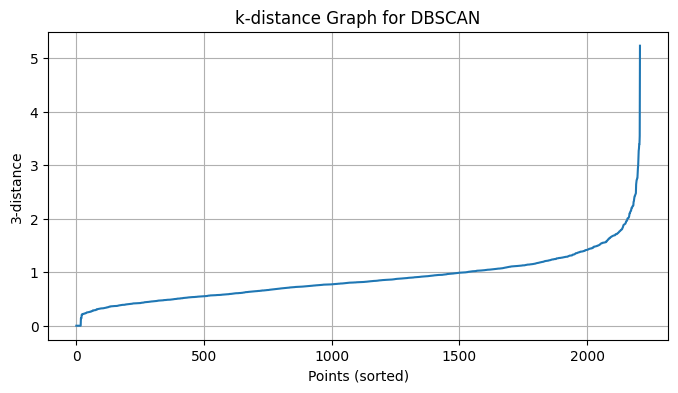

In [ ]:
# find epsilon
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


# Choose k = min_samples (often 4 to 10)
k = 3
nbrs = NearestNeighbors(n_neighbors=k).fit(df_pca)
distances, indices = nbrs.kneighbors(df_pca)

# Sort the k-th nearest distances (i.e., distances[:, k-1])
k_distances = np.sort(distances[:, k-1])

# Plot the k-distance graph
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.xlabel("Points (sorted)")
plt.ylabel(f"{k}-distance")
plt.title("k-distance Graph for DBSCAN")
plt.grid(True)
plt.show()


In [ ]:
epsilon = 1.5
min_samples = 7 # like number of dimensions

In [ ]:
# prompt: perform DBSCAN clustering

# Run DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(df_pca)
df['dbscan_cluster'] = dbscan.labels_



In [ ]:
df['dbscan_cluster'].unique()

array([ 0,  1, -1,  2])

In [ ]:
# Add DBSCAN cluster results to the dimensionality reduction dataframes for visualization
df_pca_3d['DBSCAN_Cluster'] = df['dbscan_cluster']
df_tsne['DBSCAN_Cluster'] = df['dbscan_cluster']
df_umap['DBSCAN_Cluster'] = df['dbscan_cluster']

# Visualize DBSCAN clusters in 3D PCA
fig_dbscan_pca = px.scatter_3d(df_pca_3d, x='PCA1', y='PCA2', z='PCA3', color='DBSCAN_Cluster',
                                title='DBSCAN Clusters in 3D using PCA')
fig_dbscan_pca.show()

# Visualize DBSCAN clusters in 2D t-SNE
fig_dbscan_tsne = px.scatter(df_tsne, x='TSNE1', y='TSNE2', color='DBSCAN_Cluster',
                              title='DBSCAN Clusters in 2D using t-SNE')
fig_dbscan_tsne.show()

# Visualize DBSCAN clusters in 2D UMAP
fig_dbscan_umap = px.scatter(df_umap, x='UMAP1', y='UMAP2', color='DBSCAN_Cluster',
                              title='DBSCAN Clusters in 2D using UMAP')
fig_dbscan_umap.show()

# Display the number of samples in each DBSCAN cluster
print("DBSCAN Cluster Distribution:")
print(df['dbscan_cluster'].value_counts())

DBSCAN Cluster Distribution:
dbscan_cluster
 1    1311
 0     685
-1     208
 2       4
Name: count, dtype: int64


# Try hierarchical clustering

# Try analyzing clusters from k-means

Lets see which clusters we've got

In [ ]:
px.histogram(df, x="kmeans_cluster")

In [ ]:
px.box(df, x="kmeans_cluster", y="Income")

In [ ]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'total_responses', 'high_education', 'is_single',
       'kmeans_cluster'],
      dtype='object')

In [ ]:
px.box(df, x="kmeans_cluster", y="Year_Birth")

In [ ]:
px.box(df, color="kmeans_cluster", y=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

In [ ]:
px.box(df, color="kmeans_cluster", y='Kidhome')

In [ ]:
px.box(df, color="kmeans_cluster", y='Teenhome')

In [ ]:
# prompt: display per cluster amount of customers that have any kid or teen vs don't have vs proportion

import pandas as pd
# Combine Kidhome and Teenhome into a single category: 'Has Kids/Teens' vs 'No Kids/Teens'
df['Has_Kids_Teens'] = df.apply(lambda row: 'Has Kids/Teens' if row['Kidhome'] > 0 or row['Teenhome'] > 0 else 'No Kids/Teens', axis=1)

# Calculate the count of customers in each category per cluster
kid_teen_counts = df.groupby(['kmeans_cluster', 'Has_Kids_Teens']).size().reset_index(name='count')

# Calculate the total number of customers per cluster
cluster_totals = df.groupby('kmeans_cluster').size().reset_index(name='total_cluster_count')

# Merge the counts with the total cluster counts to calculate proportions
kid_teen_proportions = pd.merge(kid_teen_counts, cluster_totals, on='kmeans_cluster')

# Calculate the proportion
kid_teen_proportions['proportion'] = kid_teen_proportions['count'] / kid_teen_proportions['total_cluster_count']

print("Per Cluster Amount of Customers with/without Kids or Teens and Proportion:")
print(kid_teen_proportions)

# Optional: Display in a more readable pivot table format
pivot_kid_teen_counts = kid_teen_counts.pivot(index='kmeans_cluster', columns='Has_Kids_Teens', values='count').fillna(0).astype(int)
print("\nCustomer Counts per Cluster (Has Kids/Teens vs No Kids/Teens):")
print(pivot_kid_teen_counts)

pivot_kid_teen_proportions = kid_teen_proportions.pivot(index='kmeans_cluster', columns='Has_Kids_Teens', values='proportion').fillna(0)
print("\nProportion of Customers per Cluster (Has Kids/Teens vs No Kids/Teens):")
pivot_kid_teen_proportions

Per Cluster Amount of Customers with/without Kids or Teens and Proportion:
   kmeans_cluster  Has_Kids_Teens  count  total_cluster_count  proportion
0               0  Has Kids/Teens    587                  623    0.942215
1               0   No Kids/Teens     36                  623    0.057785
2               1  Has Kids/Teens    123                  585    0.210256
3               1   No Kids/Teens    462                  585    0.789744
4               2  Has Kids/Teens    852                  980    0.869388
5               2   No Kids/Teens    128                  980    0.130612
6               3  Has Kids/Teens     16                   20    0.800000
7               3   No Kids/Teens      4                   20    0.200000

Customer Counts per Cluster (Has Kids/Teens vs No Kids/Teens):
Has_Kids_Teens  Has Kids/Teens  No Kids/Teens
kmeans_cluster                               
0                          587             36
1                          123            462
2          

Has_Kids_Teens,Has Kids/Teens,No Kids/Teens
kmeans_cluster,,
0,0.942215,0.057785
1,0.210256,0.789744
2,0.869388,0.130612
3,0.800000,0.200000


In [ ]:
# prompt: display per cluster proportion of have teens

import pandas as pd
# Filter for customers who have teens
df_has_teens = df[df['Teenhome'] > 0].copy()

# Calculate the count of customers with teens per cluster
teens_count = df_has_teens.groupby('kmeans_cluster').size().reset_index(name='count_has_teens')

# Calculate the total number of customers per cluster (already have this as cluster_totals from previous code)
# If you don't have cluster_totals, you would calculate it like this:
# cluster_totals = df.groupby('kmeans_cluster').size().reset_index(name='total_cluster_count')

# Merge the teens count with the total cluster counts
teens_proportions = pd.merge(teens_count, cluster_totals, on='kmeans_cluster', how='right').fillna(0)

# Calculate the proportion of customers with teens
teens_proportions['proportion_has_teens'] = teens_proportions['count_has_teens'] / teens_proportions['total_cluster_count']

print("\nPer Cluster Proportion of Customers with Teens:")
print(teens_proportions[['kmeans_cluster', 'proportion_has_teens']])


Per Cluster Proportion of Customers with Teens:
   kmeans_cluster  proportion_has_teens
0               0              0.890851
1               1              0.169231
2               2              0.410204
3               3              0.500000


It looks like there is a difference in clustering for kidhome and teenhome

In [ ]:
# prompt: display per cluster proportion of have kids

import pandas as pd
# Combine Kidhome and Teenhome into a single category: 'Has Kids' vs 'No Kids' (including teenagers)
df['Has_Kids'] = df.apply(lambda row: 'Has Kids' if row['Kidhome'] > 0 or row['Teenhome'] > 0 else 'No Kids', axis=1)

# Calculate the count of customers in each category per cluster
has_kids_counts = df.groupby(['kmeans_cluster', 'Has_Kids']).size().reset_index(name='count')

# Calculate the total number of customers per cluster
cluster_totals = df.groupby('kmeans_cluster').size().reset_index(name='total_cluster_count')

# Merge the counts with the total cluster counts to calculate proportions
has_kids_proportions = pd.merge(has_kids_counts, cluster_totals, on='kmeans_cluster')

# Calculate the proportion
has_kids_proportions['proportion'] = has_kids_proportions['count'] / has_kids_proportions['total_cluster_count']

print("Per Cluster Amount of Customers with/without Kids and Proportion:")
print(has_kids_proportions)

# Optional: Display in a more readable pivot table format
pivot_has_kids_counts = has_kids_counts.pivot(index='kmeans_cluster', columns='Has_Kids', values='count').fillna(0).astype(int)
print("\nCustomer Counts per Cluster (Has Kids vs No Kids):")
print(pivot_has_kids_counts)

pivot_has_kids_proportions = has_kids_proportions.pivot(index='kmeans_cluster', columns='Has_Kids', values='proportion').fillna(0)
print("\nProportion of Customers per Cluster (Has Kids vs No Kids):")
pivot_has_kids_proportions

Per Cluster Amount of Customers with/without Kids and Proportion:
   kmeans_cluster  Has_Kids  count  total_cluster_count  proportion
0               0  Has Kids    587                  623    0.942215
1               0   No Kids     36                  623    0.057785
2               1  Has Kids    123                  585    0.210256
3               1   No Kids    462                  585    0.789744
4               2  Has Kids    852                  980    0.869388
5               2   No Kids    128                  980    0.130612
6               3  Has Kids     16                   20    0.800000
7               3   No Kids      4                   20    0.200000

Customer Counts per Cluster (Has Kids vs No Kids):
Has_Kids        Has Kids  No Kids
kmeans_cluster                   
0                    587       36
1                    123      462
2                    852      128
3                     16        4

Proportion of Customers per Cluster (Has Kids vs No Kids):


Has_Kids,Has Kids,No Kids
kmeans_cluster,,
0,0.942215,0.057785
1,0.210256,0.789744
2,0.869388,0.130612
3,0.800000,0.200000


In [ ]:
px.box(df, color="kmeans_cluster", y='total_responses')

In [ ]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'total_responses', 'high_education', 'is_single',
       'kmeans_cluster'],
      dtype='object')

In [ ]:
px.box(df, color="kmeans_cluster", y=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'])

In [ ]:
# prompt: display for each cluster how many have and don't have high education

print("\nHigh Education Distribution per K-Means Cluster:")
edu_df = df.groupby('kmeans_cluster')['high_education'].value_counts().unstack(fill_value=0)
edu_df.columns = ['No High Education', 'High Education']
edu_df['Proportion of high education'] = edu_df['High Education'] / (edu_df['High Education'] + edu_df['No High Education'])
edu_df



High Education Distribution per K-Means Cluster:


,No High Education,High Education,Proportion of high education
kmeans_cluster,,,
0,34,589,0.945425
1,56,529,0.904274
2,159,821,0.837755
3,3,17,0.850000


In [ ]:
# prompt: display marital status for each cluster

print("\nMarital Status (is_single) Distribution per K-Means Cluster:")
marital_df = df.groupby('kmeans_cluster')['is_single'].value_counts().unstack(fill_value=0)
marital_df.columns = ['Not Single', 'Single']
marital_df['Proportion of single'] = marital_df['Single'] / (marital_df['Single'] + marital_df['Not Single'])
marital_df


Marital Status (is_single) Distribution per K-Means Cluster:


,Not Single,Single,Proportion of single
kmeans_cluster,,,
0,422,201,0.322632
1,363,222,0.379487
2,630,350,0.357143
3,13,7,0.350000


# Insights from k-means clustering

- We have a discounted chocolate, whom should we target, and how?
- We have a new wine in our store - what is the best way to promote it, and whom should we target?


**Chocolate:**
* We have very small amount of buyers who buy sweets in this dataset, but most of them are in Cluster 3
* Cluster 3 buys by far more sweets than other clusters
* Cluster 3 buyers have teens and kids at home
* Proportion of high education among these buyers is 0.85, not very huge difference from other clusters, so I wouldn't take it into account
* No special difference in marital status
* Buyers from clutser 3 also tend to buy at discounts, which means that discounted shocolate can be a bargain for them
* Buyers from cluster 3 buy both online and in store, so we can target them in both locations, they also tend to visit website - so we can target them there

**Wine**
* Buyers from cluster 0 spend most on wines, we also see that they spend a lot on meat. Cluster 2 and 3 spend MUCH LESS on wine - so we shouldnt' target them
* Since there is a correlation between spending on meat anw wine, we can take the opprtunity and target these buyers for meat-and-wine campaigns
* The median age of buyers at cluster 0 is bit higher than other clusters (median birth year - 1964)
* They have the highest proportion of highly educated persons
* They respond to deals more than other clusters
* They tend to buy on Web more than other clusters, but they buy a lot in stores as well - so we can target them both online and in brick-and-mortar shops
* They have kids and/or teens, but they have the biggest proportion of teens (probably due to older age) - so it's better to target those who have teens